In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heights-and-weights/data.csv


Predicting the weight based on height -: using Linear Regression for two variables.

Importing the libraries - 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Reading the dataset from csv file

In [39]:
data = pd.read_csv('../input/heights-and-weights/data.csv') 
print(data)



    Height  Weight
0     1.47   52.21
1     1.50   53.12
2     1.52   54.48
3     1.55   55.84
4     1.57   57.20
5     1.60   58.57
6     1.63   59.93
7     1.65   61.29
8     1.68   63.11
9     1.70   64.47
10    1.73   66.28
11    1.75   68.10
12    1.78   69.92
13    1.80   72.19
14    1.83   74.46


checking for the missing values

In [40]:

data.isnull().sum()

Height    0
Weight    0
dtype: int64

In [41]:
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [42]:
data.tail()

,Height,Weight
10,1.73,66.28
11,1.75,68.10
12,1.78,69.92
13,1.80,72.19
14,1.83,74.46


finding the relationship of the two variables by plotting the graph

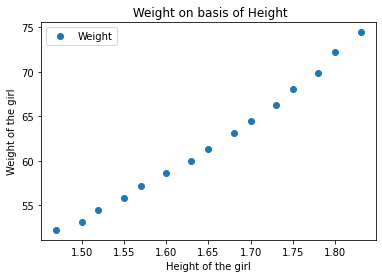

In [43]:
data.plot(x="Height",y="Weight",style="o")
plt.title(" Weight on basis of Height")
plt.xlabel("Height of the girl")
plt.ylabel("Weight of the girl")
plt.show()

now divide the data into independent(x) and dependent(y) variables.

In [44]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Splitting the data into training and testing

In [45]:

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

Applying linear Regression

In [46]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

Plotting the regression line

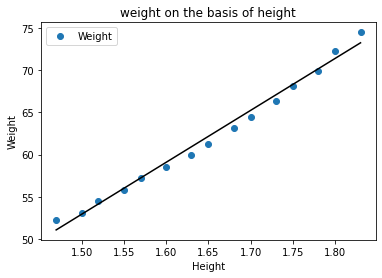

In [47]:
line = regressor.coef_*x+regressor.intercept_ ##coef stands for slope(m) and intercept stands for y-intercept(c)
data.plot(x="Height",y="Weight",style="o")
plt.title("weight on the basis of height")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(x, line , color='black');
plt.show()

Prediction - 

In [48]:
print(x_test) ##testing data - height
y_pred = regressor.predict(x_test) ##predicting the weight

[[1.5 ]
 [1.63]
 [1.68]]


Comparing Actual values and Predicted values

In [49]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data1

,Actual,Predicted
0,53.12,52.930541
1,59.93,60.920108
2,63.11,63.993019


Evaluating the performance of algorithm

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2 score error:' , r2_score(y_test, y_pred))

Mean Absolute Error: 0.6875285251817592
Mean Squared Error: 0.5986436208283817
r2 score error: 0.9655266437382162


my own prediction -

In [51]:
Height = 6.2
own_pred = regressor.predict([[Height]])
print("Predicted Weight = {}".format(own_pred[0]))

Predicted Weight = 341.78411558669006
